# Walkability of Pittsburgh Neighborhoods
Since our metric for determining the best neighborhood in Pittsburgh is what nighboorhood is best to own a dog in, we decided that more walkable neighborhoods are easier for dog owners.

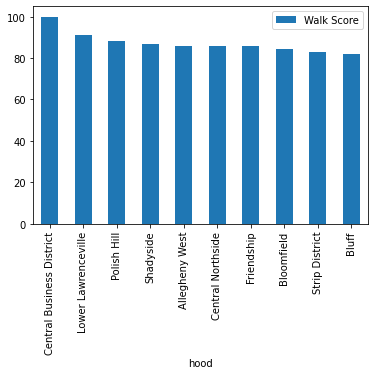

In [167]:
import pandas as pd
walk = pd.read_csv("walkscorect.xls-walk-score-by-ct.csv")
censusTractData = pd.read_csv("9756af5f-3320-4601-84e2-347d64071e25.csv")
walk["hood"] = pd.NaT #Create a column of empty "hood values"
for i in range(0,len(walk.index)):
    censusTract = walk.iat[i,0] #get census tract of column
    neighborhood = censusTractData.loc[censusTractData['tractce10'] == censusTract] #Get the neighborhood name from the census tract corrosponding to it
    try: #Sometimes the dataframe would be empty since census tracts do not exist in the city of Pittsburgh (Not in census tract data) Therefore we have to error check to make sure a value exists, or input a false value otherwise
        hood = neighborhood.iat[0,13] #gets the nieghborhood name
    except:
        hood = "N/A" #Sets to N/A if cannot find a value at 0,13 in the dataframe
    walk.loc[i, 'hood'] = hood #sets the column "hood" as the neighborhood name
aggregation_functions = {'Census Tract': 'first', 'Walk Score': 'mean', 'hood': 'first'} #Determines how to aggregate the data frame
df_new = walk.groupby(walk['hood']).aggregate(aggregation_functions) #There are multiple census tracts per neighborhood - this combines all of them into one walkability score for the entire neighborhood
del df_new["Census Tract"] #Removes the Census Tract since we do not need it. Just the neighborhood name
df_new.nlargest(10, "Walk Score").plot.bar(rot=90) #Plots the 10 highest neighborhoods in walkability scores